In [181]:
# Recommender Systems with Python
# The aim of this project was to build a recommendation system that compares products through ratings
# Once the similarity in characteristics and ratings of the users were identified, the sales person recommended
# created targetted advertising for users who showed similar liking of the product. 

In [179]:
import numpy as np
import pandas as pd

In [154]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [155]:
df = pd.read_csv('u.data',sep=',',names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [156]:
product_titles = pd.read_csv('Products_List.csv')
product_titles.head()

,item_id,product_name
0,1,Campbell's Select Harvest
1,2,Ahold
2,3,Careone
3,4,Roland
4,5,Nature's Promise


In [158]:
df = pd.merge(df,product_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,product_name
0,0,50,5,881250949,Hartz
1,290,50,5,880473582,Hartz
2,79,50,4,891271545,Hartz
3,2,50,5,888552084,Hartz
4,8,50,5,879362124,Hartz


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [160]:
df.head()

,user_id,item_id,rating,timestamp,product_name
0,0,50,5,881250949,Hartz
1,290,50,5,880473582,Hartz
2,79,50,4,891271545,Hartz
3,2,50,5,888552084,Hartz
4,8,50,5,879362124,Hartz


In [161]:
df.groupby('product_name')['rating'].mean()

product_name
100 Organic & Pure                      1.000000
22 Days                                 1.000000
4c                                      3.622222
5                                       2.853659
9ec01921-54b8-11e0-b059-005056957023    3.333333
                                          ...   
Zion Health                             3.569832
Ziploc                                  3.600000
Ziyad                                   4.011194
Zone Perfect                            2.333333
Zuke's                                  3.992701
Name: rating, Length: 1682, dtype: float64

In [162]:
df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head()

product_name
Alter Eco              5.0
Tetley                 5.0
Healthsmart            5.0
Amaretti Di Saronno    5.0
Babo Botanicals        5.0
Name: rating, dtype: float64

In [163]:
df.groupby('product_name')['rating'].count().sort_values(ascending=False).head()

product_name
Hartz               584
Nubian Heritage     509
Back To Nature      508
Marzetti            507
Full Circle Home    485
Name: rating, dtype: int64

In [164]:
ratings = pd.DataFrame(df.groupby('product_name')['rating'].mean())
ratings.head()

,rating
product_name,
100 Organic & Pure,1.000000
22 Days,1.000000
4c,3.622222
5,2.853659
9ec01921-54b8-11e0-b059-005056957023,3.333333


In [165]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('product_name')['rating'].count())
ratings.head()

,rating,num of ratings
product_name,,
100 Organic & Pure,1.000000,1
22 Days,1.000000,1
4c,3.622222,45
5,2.853659,41
9ec01921-54b8-11e0-b059-005056957023,3.333333,30


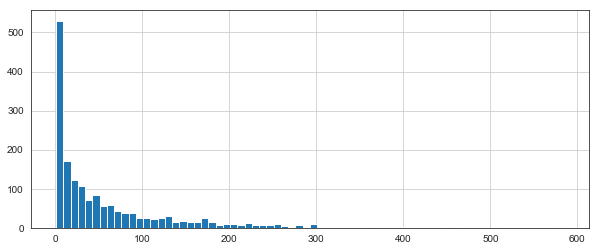

In [166]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

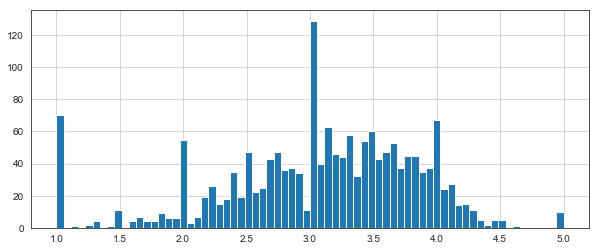

In [167]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

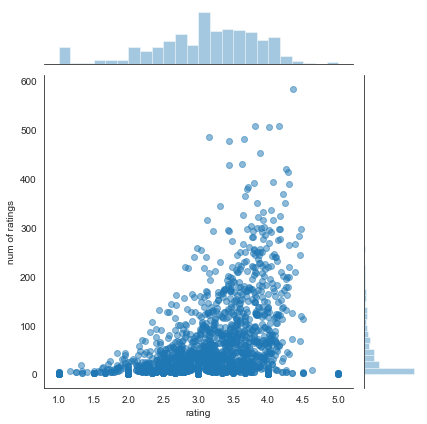

In [168]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [169]:
# Creating the recommender system

In [170]:
prodmat = df.pivot_table(index='user_id',columns='product_name',values='rating')
prodmat.head()

product_name,100 Organic & Pure,22 Days,4c,5,9ec01921-54b8-11e0-b059-005056957023,9lives,A Grosik,A La Maison,A Vogel,A.1.,...,Zebra,Zeldas Sweet Shoppe,Zevia,Zhena's Gypsy Tea,Zia Natural Skin Care,Zion Health,Ziploc,Ziyad,Zone Perfect,Zuke's
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
product_name,,
Hartz,4.359589,584
Nubian Heritage,3.803536,509
Back To Nature,4.155512,508
Marzetti,4.007890,507
Full Circle Home,3.156701,485
Nourish,3.656965,481
Edy's,3.441423,478
Campbell's Select Harvest,3.878319,452
Bell-view,3.631090,431


In [172]:
Hartz_user_ratings = prodmat['Hartz']
FullCircle_user_ratings = prodmat['Full Circle Home']
Hartz_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Hartz, dtype: float64

In [173]:
similar_to_Hartz = prodmat.corrwith(Hartz_user_ratings)
similar_to_FullCircle = prodmat.corrwith(FullCircle_user_ratings)

In [174]:
corr_Hartz = pd.DataFrame(similar_to_Hartz,columns=['Correlation'])
corr_Hartz.dropna(inplace=True)
corr_Hartz.head()

,Correlation
product_name,
4c,0.045865
5,0.116705
9ec01921-54b8-11e0-b059-005056957023,-0.070684
9lives,-1.000000
A La Maison,0.188982


In [175]:
# Testing false correlation
corr_Hartz.sort_values('Correlation',ascending=False).head(10)

,Correlation
product_name,
Hartz,1.0
Mio,1.0
Popcorners,1.0
Almondina,1.0
Skintimate,1.0
Clif Kid,1.0
Dr. Oetker,1.0
Klondike,1.0
Tropical Oasis,1.0


In [176]:
corr_Hartz = corr_Hartz.join(ratings['num of ratings'])
corr_Hartz.head()
# This code fixes false correlations by joining the title to the ratings, allowing us to filter ratings based 
# on the number of ratings --> that is few ratings with high ratings are ignored

,Correlation,num of ratings
product_name,,
4c,0.045865,45
5,0.116705,41
9ec01921-54b8-11e0-b059-005056957023,-0.070684,30
9lives,-1.000000,4
A La Maison,0.188982,10


In [177]:
corr_Hartz[corr_Hartz['num of ratings']>100].sort_values('Correlation',ascending=False).head()
# We limit the number of ratings to more than hundred instead of say five people giving a five star rating

,Correlation,num of ratings
product_name,,
Hartz,1.000000,584
Iams,0.748353,368
Marzetti,0.672556,507
Friskies,0.536117,420
Divina,0.377433,130


In [178]:
# We also do the same for the second movie liar liar
corr_FullCircle = pd.DataFrame(similar_to_FullCircle,columns=['Correlation'])
corr_FullCircle.dropna(inplace=True)
corr_FullCircle = corr_FullCircle.join(ratings['num of ratings'])
corr_FullCircle[corr_FullCircle['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
product_name,,
Full Circle Home,1.000000,485
Ge,0.516968,114
Progresso,0.484650,129
Vita,0.472681,101
Sterilite,0.469828,137


In [ ]:
# Conclusion: Hartz is the most sold product with the highest rating by users. The most correlated product to 
# Hartz is lams, with a correlation of 0.748, followed by Marzetti, Friskies, and Divina. 
# Similarly, Ge is the most similar product to Full Circle Home, followed by Progresso, Vita, and Sterilite. 